In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Ein Würfel

In [2]:
def spiel_mir_das_spiel_der_grossen_zahlen(anzahl_ausfuehrungen):
    absolute_haeufigkeiten = {
        1: 0,
        2: 0,
        3: 0,
        4: 0,
        5: 0,
        6: 0
    }
    for _ in range(anzahl_ausfuehrungen):
        neuer_zufallswurf = random.randint(1, 6)
        absolute_haeufigkeiten[neuer_zufallswurf] += 1
    relative_haeufigkeiten = {k: float(v) / anzahl_ausfuehrungen for k, v in absolute_haeufigkeiten.items()}
    return absolute_haeufigkeiten, relative_haeufigkeiten

Mittelwert absolut:  16666.6666667
Mittelwert relativ: 0.166666666667
Absolute Häufigkeiten:  {1: 16707, 2: 16615, 3: 16687, 4: 16673, 5: 16659, 6: 16659}
Relative Häufigkeiten:  {1: 0.16707, 2: 0.16615, 3: 0.16687, 4: 0.16673, 5: 0.16659, 6: 0.16659}


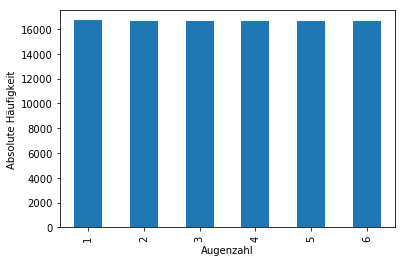

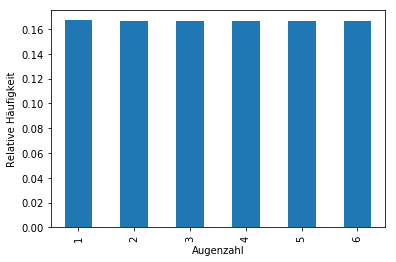

In [3]:
ANZAHL_WUERFE = 100000

absolute_haeufigkeiten, relative_haeufigkeiten = spiel_mir_das_spiel_der_grossen_zahlen(ANZAHL_WUERFE)
print "Mittelwert absolut: ", float(ANZAHL_WUERFE) / 6
print "Mittelwert relativ: {}".format( 1.0 / 6)
print "Absolute Häufigkeiten: ", absolute_haeufigkeiten
print "Relative Häufigkeiten: ", relative_haeufigkeiten
df_absolute_haeufigkeiten =pd.DataFrame({"Augenzahl": absolute_haeufigkeiten.keys(), "Absolute Häufigkeit": absolute_haeufigkeiten.values()})
ax_abs = df_absolute_haeufigkeiten.plot.bar(x="Augenzahl", y="Absolute Häufigkeit", legend=None)
ax_abs.set_xlabel('Augenzahl')
ax_abs.set_ylabel(u'Absolute Häufigkeit')
df_relative_haeufigkeiten =pd.DataFrame({"Augenzahl": relative_haeufigkeiten.keys(), "Relative Häufigkeit": relative_haeufigkeiten.values()})
ax_rel = df_relative_haeufigkeiten.plot.bar(x="Augenzahl", y="Relative Häufigkeit", legend=None)
ax_rel.set_xlabel('Augenzahl')
ax_rel.set_ylabel(u'Relative Häufigkeit')
plt.show()

# Zwei Würfel

## Wie gross ist die Wahrscheinlichkeit, mit zwei Würfeln die Augensumme 7 zu werfen?

In [4]:
def zaehle_wuerfe_mit_gegebener_augensumme(anzahl_ausfuehrungen, augensumme):
    anzahl_erfolge = 0
    for _ in range(anzahl_ausfuehrungen):
        zufaellige_zahl_wuerfel_1 = random.randint(1, 6)
        zufaellige_zahl_wuerfel_2 = random.randint(1, 6)
        if zufaellige_zahl_wuerfel_1 + zufaellige_zahl_wuerfel_2 == augensumme:
            anzahl_erfolge += 1
    return anzahl_erfolge, float(anzahl_erfolge) / anzahl_ausfuehrungen

In [5]:
abs_haeufigkeit, rel_haeufigkeit = zaehle_wuerfe_mit_gegebener_augensumme(100000, 7)
print "Absolute Häufigkeit: {}".format(abs_haeufigkeit)
print "Relative Häufigkeit: {}".format(rel_haeufigkeit)

Absolute Häufigkeit: 16673
Relative Häufigkeit: 0.16673


# Schätzung von Pi

In [6]:
def schaetze_pi(anzahl_ausfuehrungen):
    zufaellige_punkte = [(random.random(), random.random()) for _ in range(anzahl_ausfuehrungen)]
    points_in = []
    points_out = []
    relative_haeufigkeiten = []
    nb_points_inside = 0
    for ind, zuf_punkt in enumerate(zufaellige_punkte):
        if (math.pow(zuf_punkt[0] - 0.5, 2) + math.pow(zuf_punkt[1] - 0.5, 2)) <= 0.25:
            nb_points_inside += 1
            points_in += [zuf_punkt]
        else:
            points_out += [zuf_punkt]
        relative_haeufigkeiten += [float(nb_points_inside) / float(ind + 1)]    
    fig, ((ax_square, ax_conv), (ax_off, ax_conv_small)) = plt.subplots(2, 2)
    x_in, y_in = zip(*points_in)
    point_size = 5
    ax_square.scatter(x_in, y_in, color="g", s=point_size)
    x_out, y_out = zip(*points_out)
    ax_square.scatter(x_out, y_out, color="r", s=point_size)
    circle = plt.Circle((0.5, 0.5), radius=0.5, fill=False)
    ax_square.add_artist(circle)
    ax_square.set_xlim(0, 1)
    ax_square.set_ylim(0, 1)
    ax_square.set_aspect('equal', adjustable='box')
    ax_square.set_xlabel(u"x")
    ax_square.set_ylabel(u"y")
    limit = math.pi / 4
    for ax in [ax_conv, ax_conv_small]:
        ax.plot(relative_haeufigkeiten, "-")
        ax.axhline(limit, color="g")
        if ax == ax_conv:
            ax.set_ylim(0, 1)
            ax.set_yticks(np.arange(0, 1.0001, 0.05))
        if ax == ax_conv_small:
            print "hier"
            y_min = 0.75
            y_max = 0.85
            ax.set_ylim(y_min, y_max)
            ax.set_yticks(np.arange(y_min, y_max, 0.01))
        ax.grid()
        ax.set_xlabel(u"Anzahl Ausführungen")
        ax.set_ylabel(u"Relative Häufigkeit")
    ax_off.axis("off")
    fig.set_size_inches(22, 22)
    plt.show()
    return relative_haeufigkeiten[-1], limit

hier


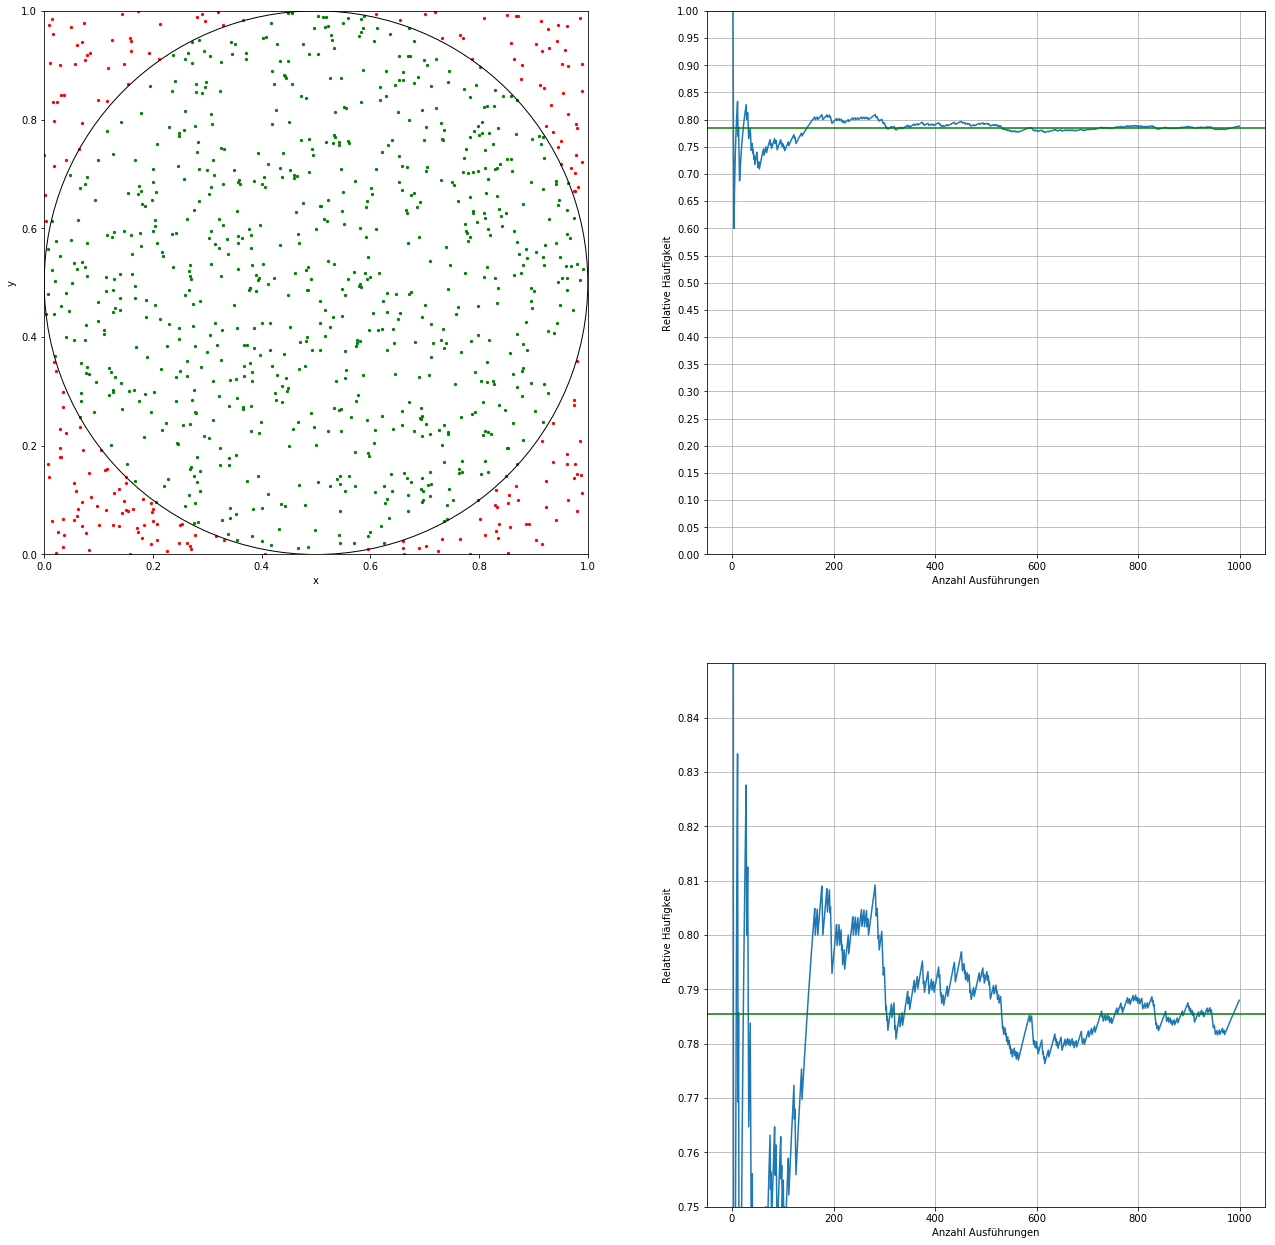

Erwartet: 0.785398163397, relative Häufigkeit: 0.788, Abweichung in %: 0.331276125131%


In [7]:
relative_haeufigkeit, erwartet = schaetze_pi(1000)
print "Erwartet: {}, relative Häufigkeit: {}, Abweichung in %: {}%".format(erwartet, relative_haeufigkeit, (relative_haeufigkeit / erwartet - 1) * 100)